## WeGo Data Introduction

In [5]:
import pandas as pd

In [6]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [7]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [8]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [9]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [10]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [11]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [12]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [13]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [14]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [15]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

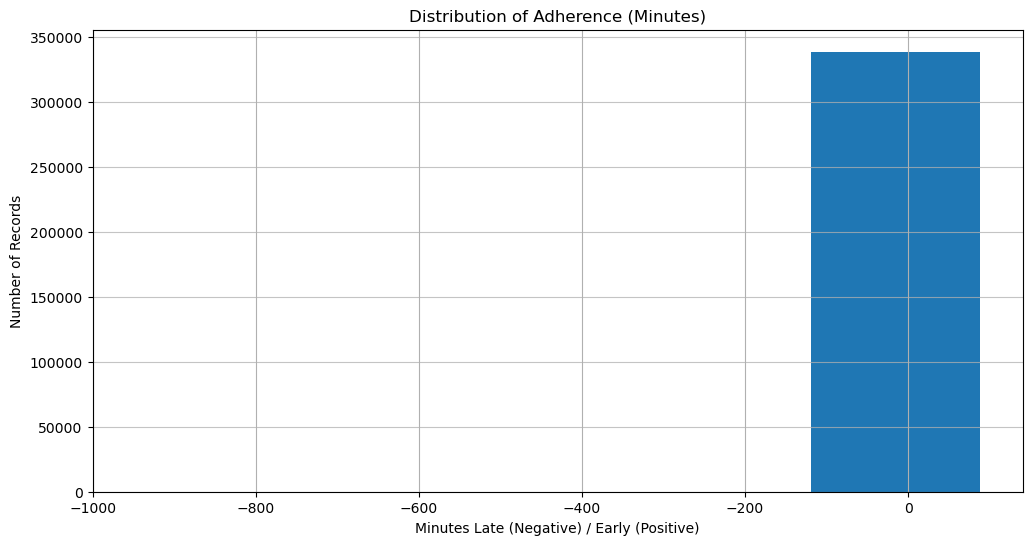

In [17]:
plt.figure(figsize=(12, 6))
# Adjust range based on describe() output if needed, e.g., range=(-15, 10)
wego['ADHERENCE'].hist(bins=5)
plt.title('Distribution of Adherence (Minutes)')
plt.xlabel('Minutes Late (Negative) / Early (Positive)') # Label based on dictionary definition
plt.ylabel('Number of Records')
plt.grid(axis='y', alpha=0.75)
plt.show()

                mean    median       std  count
ROUTE_ABBR                                     
3          -3.761491 -2.566666  5.415910  45488
7          -3.346555 -2.116666  6.669753  17267
22         -1.138107 -0.933333  6.391798  25188
23         -1.760110 -1.316666  7.680491  39653
50         -2.505022 -1.800000  6.159666  42629
52         -3.971342 -2.066666  8.721732  49327
55         -4.823302 -2.883333  7.535092  60359
56         -2.703988 -1.900000  4.931009  58950


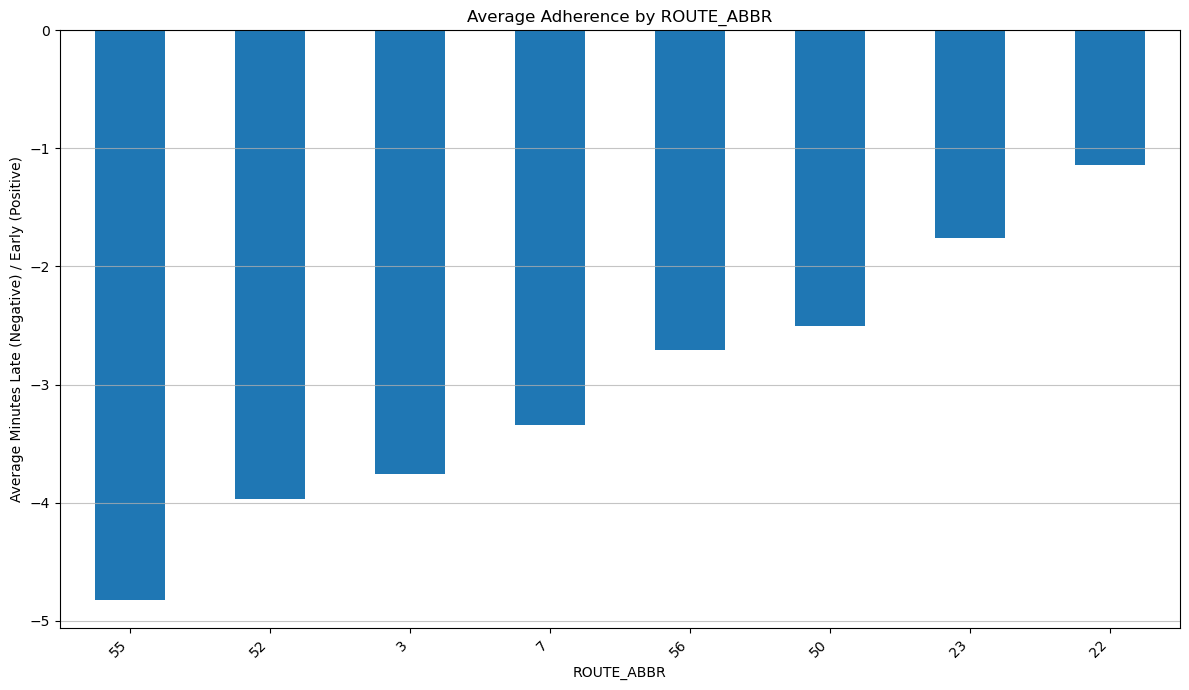

In [18]:
route_col = 'ROUTE_ABBR'
adherence_by_route = wego.groupby(route_col)['ADHERENCE'].agg(['mean', 'median', 'std', 'count'])
print(adherence_by_route)


plt.figure(figsize=(12, 7))
adherence_by_route['mean'].sort_values().plot(kind='bar')
plt.title(f'Average Adherence by {route_col}')
plt.xlabel(f'{route_col}')
plt.ylabel('Average Minutes Late (Negative) / Early (Positive)') # Label based on dictionary definition
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

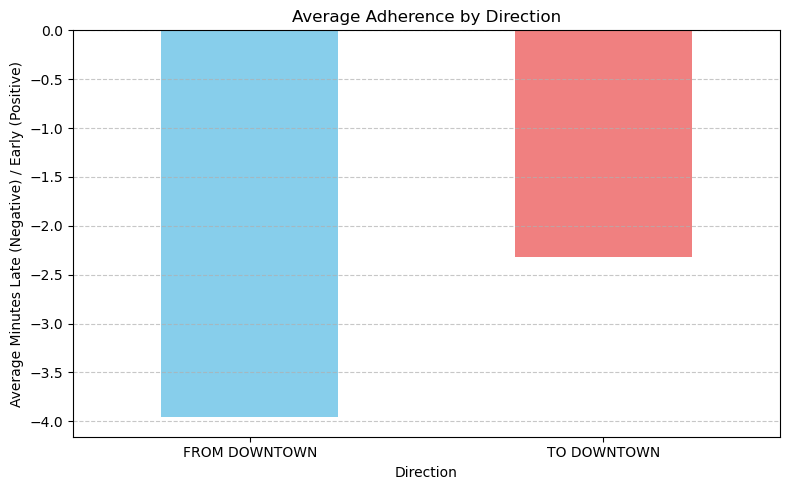

In [19]:
direction_col = 'ROUTE_DIRECTION_NAME'
adherence_col = 'ADHERENCE'
on_time_lower = -6
on_time_upper = 1
adherence_by_direction = wego.groupby(direction_col)[adherence_col].agg(['mean', 'median', 'std', 'count'])


# Bar chart for Average Adherence by Direction
plt.figure(figsize=(8, 5))
adherence_by_direction['mean'].plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Adherence by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Minutes Late (Negative) / Early (Positive)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# Bar chart for % On-Time by Direction
ontime_by_edge = wego.groupby('TRIP_EDGE')[adherence_col].apply(
        percent_on_time, lower=on_time_lower, upper=on_time_upper
    )
plt.figure(figsize=(8, 5))
ontime_by_direction.plot(kind='bar', color=['skyblue', 'lightcoral']) # Adjust colors if more directions
plt.title(f'% On-Time ({on_time_lower} to +{on_time_upper} mins) by Direction')
plt.xlabel('Direction')
plt.ylabel('Percentage On-Time (%)')
plt.ylim(0, 100) # Set y-axis limit for percentage
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'percent_on_time' is not defined

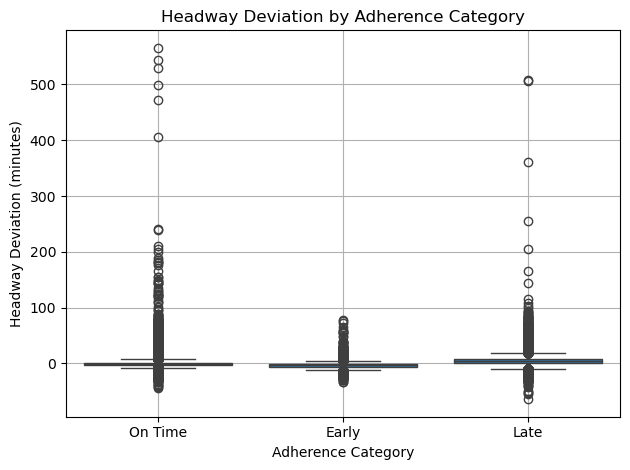

In [21]:
adherence_vs_headway = wego[["ADHERENCE", "HDWY_DEV", "SCHEDULED_HDWY"]].dropna()


#Create categories
def categorize_adherence(x):
    if x > 1:
        return "Early"
    elif x < -6:
        return "Late"
    else:
        return "On Time"

adherence_vs_headway["Adherence_Category"] = adherence_vs_headway["ADHERENCE"].apply(categorize_adherence)

#Boxplot
plt.figure()
sns.boxplot(x="Adherence_Category", y="HDWY_DEV", data=adherence_vs_headway)
plt.title("Headway Deviation by Adherence Category")
plt.xlabel("Adherence Category")
plt.ylabel("Headway Deviation (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
adherence_vs_headway.describe()

,ADHERENCE,HDWY_DEV,SCHEDULED_HDWY
count,265893.000000,265893.000000,265893.000000
mean,-3.503376,0.518081,18.104595
std,6.501201,7.161798,11.907397
min,-948.533333,-64.000000,0.000000
25%,-4.616666,-2.316667,10.000000
50%,-2.216666,0.033333,15.000000
75%,-0.666666,2.483333,20.000000
max,85.666666,565.433333,503.000000


In [35]:
# Defining the unique trip identifier.
if 'DATE' in wego.columns:
    trip_date_col = 'DATE'
elif 'CALENDAR_ID' in wego.columns:
    trip_date_col = 'CALENDAR_ID'
else:
    print("Warning: Cannot find DATE or CALENDAR_ID column for unique trip identification.")
    # Group only by TRIP_ID
    trip_date_col = None 

unique_trip_cols = ['TRIP_ID', trip_date_col] if trip_date_col else ['TRIP_ID']

In [36]:
#  Get first stop data (TRIP_EDGE == 1)
first_stops = wego[wego['TRIP_EDGE'] == 1].copy()
first_stops = first_stops.dropna(subset=unique_trip_cols + ['ADHERENCE', 'HDWY_DEV'])
first_stops_agg = first_stops.groupby(unique_trip_cols).agg(
    first_stop_adherence=('ADHERENCE', 'mean'),
    first_stop_hdw_dev=('HDWY_DEV', 'mean')
).reset_index()


In [37]:
first_stops.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HOUR,Adherence_Category
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,13.216666,10.0,5,On Time
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,10.800000,5.0,6,On Time
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,12.533333,7.0,6,On Time
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,10.916666,5.0,7,On Time
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,12.250000,9.0,7,On Time


In [38]:
# Get last stop data (TRIP_EDGE == 2)
# There is no actual headway for the last stop data
last_stops = wego[wego['TRIP_EDGE'] == 2].copy()

In [39]:
last_stops.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HOUR,Adherence_Category
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,5,Early
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,5,Early
10,120230801,1,99457900,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,6,Early
13,120230801,1,99457903,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,6,Early
17,120230801,1,99457907,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,7,Early


In [28]:
# For the sake of the comparison frame, I will still create an aggregate frame for the last stops. 
# The results will contain NaaNs
last_stops = last_stops.dropna(subset=unique_trip_cols + ['ADHERENCE', 'HDWY_DEV'])
last_stops_agg = last_stops.groupby(unique_trip_cols).agg(
    last_stop_adherence=('ADHERENCE', 'mean'),
    last_stop_hdw_dev=('HDWY_DEV', 'mean')
).reset_index()

In [29]:
last_stops_agg.head()

,TRIP_ID,DATE,last_stop_adherence,last_stop_hdw_dev


In [42]:
# Now to merge the columns
trip_comparison = pd.merge(first_stops, last_stops, on=unique_trip_cols, how='inner')
trip_comparison.head()

,CALENDAR_ID_x,SERVICE_ABBR_x,ADHERENCE_ID_x,DATE,ROUTE_ABBR_x,BLOCK_ABBR_x,OPERATOR_x,TRIP_ID,OVERLOAD_ID_x,ROUTE_DIRECTION_NAME_x,...,ADJUSTED_EARLY_COUNT_y,ADJUSTED_LATE_COUNT_y,ADJUSTED_ONTIME_COUNT_y,STOP_CANCELLED_y,PREV_SCHED_STOP_CANCELLED_y,IS_RELIEF_y,DWELL_IN_MINS_y,SCHEDULED_LAYOVER_MINUTES_y,HOUR_y,Adherence_Category_y
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,6,Early
1,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,6,Early
2,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,7,Early
3,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,7,Early
4,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.0,NaN,8,Early


In [43]:
# I will now attempt to analyze a correlation
if not trip_comparison.empty:
    # Adherence Correlation
    corr_adherence = trip_comparison['first_stop_adherence'].corr(trip_comparison['last_stop_adherence'])
    print(f"\nCorrelation between first stop adherence and last stop adherence: {corr_adherence:.3f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=trip_comparison, x='first_stop_adherence', y='last_stop_adherence', alpha=0.5)
    plt.title('Last Stop Adherence vs First Stop Adherence')
    plt.xlabel('First Stop Adherence (min, Neg=Late)')
    plt.ylabel('Last Stop Adherence (min, Neg=Late)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Could not create trip comparison data. Check filters or data.")

KeyError: 'first_stop_adherence'

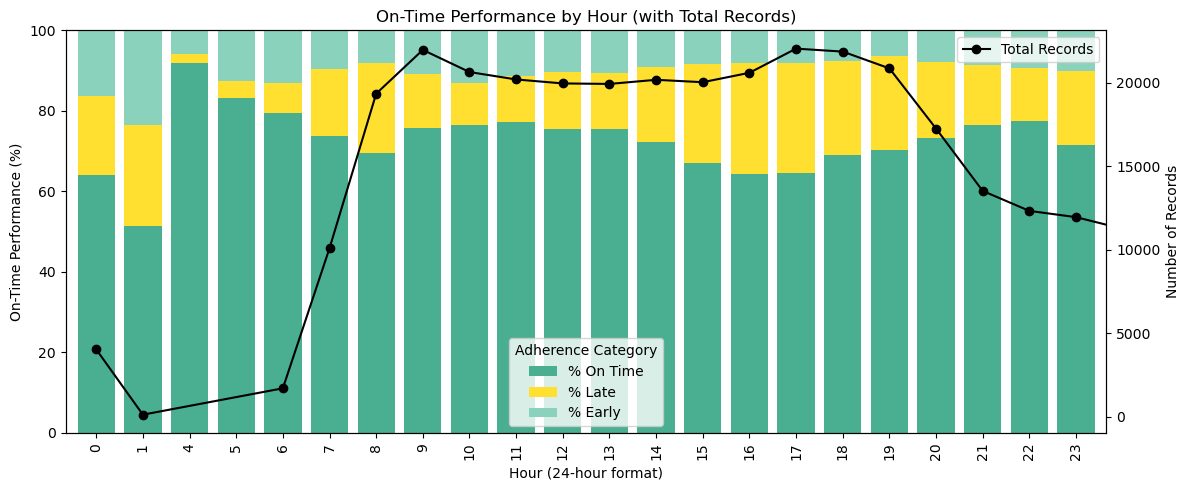

In [33]:
df_friday = wego.copy()

# --- Data Preparation ---
# 1. Ensure time columns and types, create HOUR and DAY_OF_WEEK
try:
    df_friday['DATETIME'] = pd.to_datetime(df_friday['SCHEDULED_TIME'], errors='coerce')
    df_friday['HOUR'] = df_friday['DATETIME'].dt.hour
    df_friday['DAY_OF_WEEK'] = df_friday['DATETIME'].dt.day_name() # Need day name for filtering
    df_friday['ADHERENCE'] = pd.to_numeric(df_friday['ADHERENCE'], errors='coerce')
    # Minimal drop for essential columns for this plot
    df_friday.dropna(subset=['DATETIME', 'HOUR', 'DAY_OF_WEEK', 'ADHERENCE'], inplace=True)
except Exception as e:
    print(f"Error during data preparation: {e}")
    raise ValueError("Could not process required columns.") from e

# 2. **** FILTER FOR FRIDAY ****
friday_data = df_friday[df_friday['DAY_OF_WEEK'] == 'Friday'].copy()
print(f"Filtered down to {len(friday_data)} records for Friday.")

if friday_data.empty:
    print("No data found for Friday. Cannot generate plot.")
else:
    # 3. Define and apply adherence categorization
    def categorize_adherence(x):
        if pd.isna(x): return "Unknown"
        elif x > 1: return "Early"
        elif x < -6: return "Late"
        else: return "On Time"
    friday_data['Adherence_Category'] = friday_data['ADHERENCE'].apply(categorize_adherence)

    # 4. Group by Hour and Adherence Category (using ONLY Friday data)
    friday_hourly_counts = friday_data.groupby(['HOUR', 'Adherence_Category']).size().unstack(fill_value=0)

    # Ensure all expected categories exist
    expected_categories = ['On Time', 'Late', 'Early']
    for cat in expected_categories:
        if cat not in friday_hourly_counts.columns:
            friday_hourly_counts[cat] = 0
    friday_hourly_counts = friday_hourly_counts[expected_categories]

    # 5. Calculate Total and Percentage Performance for Friday
    friday_hourly_counts["Total"] = friday_hourly_counts.sum(axis=1)
    for cat in expected_categories:
         friday_hourly_counts[f"% {cat}"] = friday_hourly_counts.apply(lambda row: (row[cat] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)

    # --- Plotting ---
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Define colors
    colors = ['#4aaf91', '#ffe031', '#8bd2bd'] # On Time, Late, Early
    plot_cols = ["% On Time", "% Late", "% Early"]

    # Plot using Friday's hourly data
    plot_data = friday_hourly_counts[plot_cols]
    plot_data.plot(kind="bar", stacked=True, ax=ax1, width=0.8, color=colors)

    ax1.set_ylabel("On-Time Performance (%)")
    ax1.set_ylim(0, 100)
    ax1.legend(loc="lower center", title="Adherence Category", ncol=3)
    ax1.set_xlabel("Hour (24-hour format)")

    # Second y-axis for number of stops on Friday
    ax2 = ax1.twinx()
    ax2.plot(friday_hourly_counts.index, friday_hourly_counts["Total"], color="black", marker="o", linestyle='--', label="Total Records (Friday)")
    ax2.set_ylabel("Number of Records")
    ax2.legend(loc="upper right")
    ax2.set_ylim(bottom=0)

    # Update title
    plt.title("FRIDAY On-Time Performance by Hour (with Total Records)")
    plt.xticks(ticks=range(len(friday_hourly_counts.index)), labels=friday_hourly_counts.index, rotation=0)
    plt.tight_layout()
    plt.show()

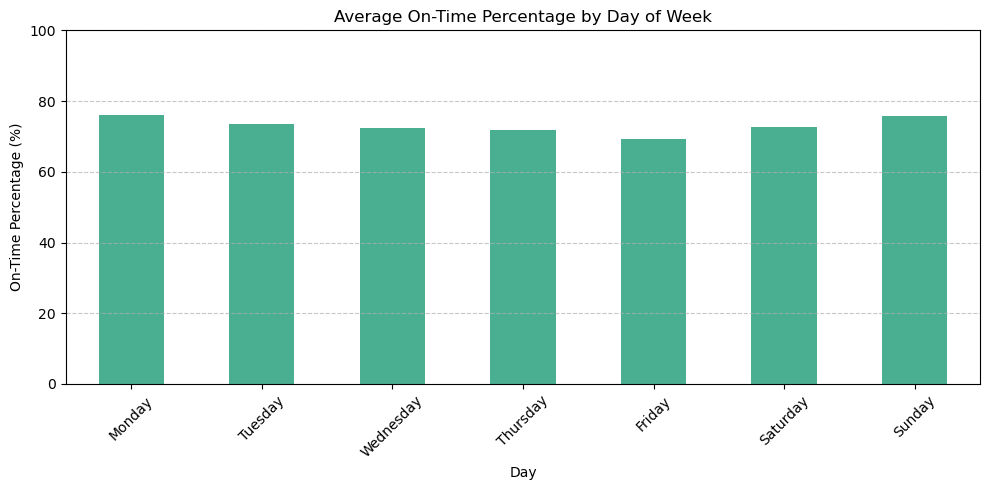

ValueError: keyword grid_ax is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

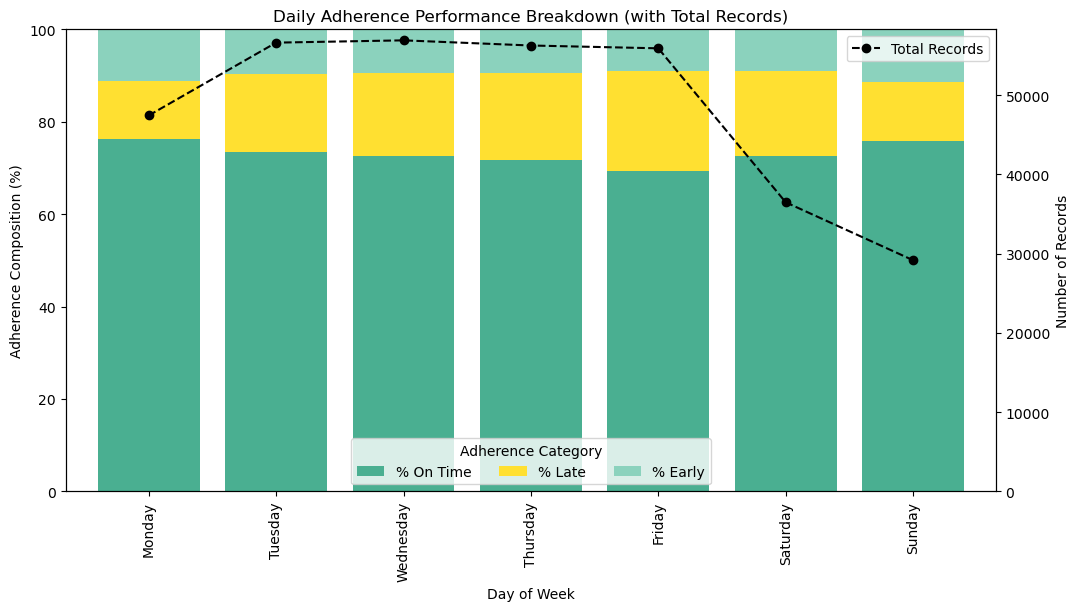

In [48]:
try:
    # Using .copy() to avoid SettingWithCopyWarning if 'wego' is a slice
    wego = wego.copy()
    wego['DATETIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
except Exception as e:
    print(f"Error converting SCHEDULED_TIME to datetime: {e}")
    raise ValueError("Could not process SCHEDULED_TIME column.") from e

# 2. Extract Day of Week Name
wego['DAY_OF_WEEK'] = wego['DATETIME'].dt.day_name()

# 3. Define the function to categorize adherence
def categorize_adherence(x):
    if pd.isna(x):
        return "Unknown"
    elif x > 1: # More than 1 minute early
        return "Early"
    elif x < -6: # More than 6 minutes late
        return "Late"
    else: # Between 1 min early and 6 min late
        return "On Time"

# 4. Apply the function to create the Adherence_Category column
wego['Adherence_Category'] = wego['ADHERENCE'].apply(categorize_adherence)

# 5. Group by Day and Adherence Category, then count occurrences
daily_counts = wego.groupby(['DAY_OF_WEEK', 'Adherence_Category']).size().unstack(fill_value=0)

# 6. Ensure all expected categories exist
expected_categories = ['On Time', 'Late', 'Early']
for cat in expected_categories:
    if cat not in daily_counts.columns:
        daily_counts[cat] = 0

# Keep only the expected categories if others exist (like 'Unknown')
daily_counts = daily_counts[expected_categories]

# 7. Calculate Total and Percentage On Time
daily_counts["Total"] = daily_counts.sum(axis=1)
daily_counts["% On Time"] = daily_counts.apply(lambda row: (row["On Time"] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)

# 8. Prepare data for plotting (the 'weekday_perf' Series)
weekday_perf = daily_counts["% On Time"]

# 9. Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Reindex to ensure correct plotting order, handling potentially missing days
weekday_perf = weekday_perf.reindex(day_order, fill_value=0)

# --- Plotting ---
plt.figure(figsize=(10, 5))

# Use the calculated weekday_perf data and the theme color
weekday_perf.plot(kind='bar', color='#4aaf91') # Using your theme's 'good' color

plt.title('Average On-Time Percentage by Day of Week')
plt.xlabel('Day')
plt.ylabel('On-Time Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added style to grid
plt.tight_layout() # Adjust layout
plt.show()

daily_counts["% On Time"] = daily_counts.apply(lambda row: (row["On Time"] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)
daily_counts["% Late"] = daily_counts.apply(lambda row: (row["Late"] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)
daily_counts["% Early"] = daily_counts.apply(lambda row: (row["Early"] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plot_data_daily = daily_counts.reindex(day_order, fill_value=0)

fig, ax1 = plt.subplots(figsize=(12, 6)) # Slightly larger figure

# Define colors (matching the order: On Time, Late, Early)
colors = ['#4aaf91', '#ffe031', '#8bd2bd']

# Columns to plot in the desired stack order
plot_cols = ["% On Time", "% Late", "% Early"]

# Stacked bars for % performance using the defined colors
plot_data_daily[plot_cols].plot(
    kind="bar",
    stacked=True,
    ax=ax1,
    width=0.8,
    color=colors
)
ax1.set_ylabel("Adherence Composition (%)")
ax1.set_ylim(0, 100)
ax1.legend(loc="lower center", title="Adherence Category", ncol=3) # Adjust legend
ax1.set_xlabel("Day of Week")

# Second y-axis for number of records
ax2 = ax1.twinx()
ax2.plot(plot_data_daily.index, plot_data_daily["Total"], color="black", marker="o", linestyle='--', label="Total Records")
ax2.set_ylabel("Number of Records")
ax2.legend(loc="upper right")
# Optional: Adjust secondary y-axis limits if needed to avoid overlap
ax2.set_ylim(bottom=0)


plt.title("Daily Adherence Performance Breakdown (with Total Records)")
# Use day names directly for ticks now
plt.xticks(rotation=45, ha='right') # Adjust rotation and alignment
plt.grid(axis='y', linestyle='--', alpha=0.7, which='major',ax=ax1) # Grid on primary axis
plt.tight_layout()
plt.show()

In [50]:
try:
    # Use .copy() to avoid warnings if wego is a slice
    analysis_df = wego.copy()
    if 'SCHEDULED_TIME' not in analysis_df.columns or 'ADHERENCE' not in analysis_df.columns:
         raise ValueError("Required columns 'SCHEDULED_TIME' or 'ADHERENCE' not found.")

    analysis_df['DATETIME'] = pd.to_datetime(analysis_df['SCHEDULED_TIME'])
    analysis_df['ADHERENCE'] = pd.to_numeric(analysis_df['ADHERENCE'], errors='coerce')
    analysis_df['TRIP_EDGE'] = pd.to_numeric(analysis_df['TRIP_EDGE'], errors='coerce').astype(pd.Int64Dtype())
    analysis_df['ROUTE_STOP_SEQUENCE'] = pd.to_numeric(analysis_df['ROUTE_STOP_SEQUENCE'], errors='coerce').astype(pd.Int64Dtype())
    analysis_df['SCHEDULED_LAYOVER_MINUTES'] = pd.to_numeric(analysis_df['SCHEDULED_LAYOVER_MINUTES'], errors='coerce')
    analysis_df['TRIP_ID'] = pd.to_numeric(analysis_df['TRIP_ID'], errors='coerce').astype(pd.Int64Dtype())
    analysis_df['CALENDAR_ID'] = pd.to_numeric(analysis_df['CALENDAR_ID'], errors='coerce').astype(pd.Int64Dtype())

    # Add DAY_OF_WEEK if it doesn't exist
    if 'DAY_OF_WEEK' not in analysis_df.columns:
        analysis_df['DAY_OF_WEEK'] = analysis_df['DATETIME'].dt.day_name()

    # Drop rows essential for this analysis if they became NaN after conversion
    analysis_df.dropna(subset=['ADHERENCE', 'TRIP_EDGE', 'ROUTE_STOP_SEQUENCE',
                                'SCHEDULED_LAYOVER_MINUTES', 'TRIP_ID', 'CALENDAR_ID', 'DAY_OF_WEEK'], inplace=True)

except Exception as e:
    print(f"Error during simplified data preparation: {e}")
    raise # Stop if essential prep fails

# 2. Define Weekdays (reusable variable)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# 3. Filter for Weekdays
weekday_data = analysis_df[analysis_df['DAY_OF_WEEK'].isin(weekdays)]

if weekday_data.empty:
    print("No weekday data found after filtering. Cannot proceed.")
else:
    print(f"Using {len(weekday_data)} weekday records.")

    # 4. Get Layover for Starting Trips
    layover_df = weekday_data[weekday_data['TRIP_EDGE'] == 1][
        ['TRIP_ID', 'CALENDAR_ID', 'SCHEDULED_LAYOVER_MINUTES']
    ].drop_duplicates(subset=['TRIP_ID', 'CALENDAR_ID'])
    print(f"Found {len(layover_df)} unique trip starts with layover info.")

    # 5. Get Adherence at First Stop (Sequence 1 only)
    first_stop_df = weekday_data[
        (weekday_data['TRIP_EDGE'] == 0) & (weekday_data['ROUTE_STOP_SEQUENCE'] == 1)
    ][['TRIP_ID', 'CALENDAR_ID', 'ADHERENCE']].drop_duplicates(subset=['TRIP_ID', 'CALENDAR_ID'])
    print(f"Found {len(first_stop_df)} unique first stops (Seq 1) with adherence.")

    # 6. Merge the Layover and First Stop Adherence
    merged_df = pd.merge(
        layover_df,
        first_stop_df,
        on=['TRIP_ID', 'CALENDAR_ID'],
        how='inner' # Only keep trips with both layover and first stop data
    )
    print(f"Merged data contains {len(merged_df)} trips.")

    # --- Simplified Visualization ---
    if not merged_df.empty:
        # Calculate correlation for context
        correlation = merged_df['SCHEDULED_LAYOVER_MINUTES'].corr(merged_df['ADHERENCE'])
        print(f"Correlation between Layover and First Stop Adherence: {correlation:.4f}")

        # Create Scatter Plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=merged_df, x='SCHEDULED_LAYOVER_MINUTES', y='ADHERENCE', alpha=0.4) # Increased alpha slightly

        # Optional: Add a regression line only (no scatter points repeated)
        # sns.regplot(data=merged_df, x='SCHEDULED_LAYOVER_MINUTES', y='ADHERENCE', scatter=False, color='red')

        plt.title(f'Weekday First Stop Adherence vs. Scheduled Layover\n(Correlation: {correlation:.2f})')
        plt.xlabel('Scheduled Layover (Minutes)')
        plt.ylabel('Adherence at First Stop (Minutes)')
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Line at 0 adherence
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Merged data is empty, cannot create plot.")

print("Simplified analysis finished.")

Using 43029 weekday records.
Found 43027 unique trip starts with layover info.
Found 0 unique first stops (Seq 1) with adherence.
Merged data contains 0 trips.
Merged data is empty, cannot create plot.
Simplified analysis finished.


In [51]:
# Assuming 'weekday_data' DataFrame exists from the previous script run
print("Sequence numbers where TRIP_EDGE == 1 (Trip Start):")
print(weekday_data[weekday_data['TRIP_EDGE'] == 1]['ROUTE_STOP_SEQUENCE'].value_counts().sort_index().head(10))

Sequence numbers where TRIP_EDGE == 1 (Trip Start):
ROUTE_STOP_SEQUENCE
1     2729
2     8410
3     1393
5     8360
6     5751
7     1351
8     1145
9     1520
11    6766
12    2327
Name: count, dtype: Int64


In [52]:
# Assuming 'weekday_data' DataFrame exists
print("\nSmallest sequence numbers where TRIP_EDGE == 0 (Intermediate Stops):")
# Find the minimum sequence number for intermediate stops within each trip
min_intermediate_seq = weekday_data[weekday_data['TRIP_EDGE'] == 0].groupby(['TRIP_ID', 'CALENDAR_ID'])['ROUTE_STOP_SEQUENCE'].min()
print(min_intermediate_seq.value_counts().sort_index().head(10))


Smallest sequence numbers where TRIP_EDGE == 0 (Intermediate Stops):
Series([], Name: count, dtype: Int64)


In [53]:
# Check TRIP_EDGE values in the ORIGINAL wego dataframe
print("Value Counts for TRIP_EDGE in original 'wego' DataFrame:")
if 'wego' in locals() or 'wego' in globals():
    print(wego['TRIP_EDGE'].value_counts(dropna=False))
else:
    print("'wego' DataFrame not found.")

print("\n" + "="*30 + "\n") # Separator

# Check TRIP_EDGE values in the filtered weekday_data dataframe
print("Value Counts for TRIP_EDGE in filtered 'weekday_data' DataFrame:")
if 'weekday_data' in locals() or 'weekday_data' in globals():
    # Ensure the column exists and handle potential errors if it was dropped
    if 'TRIP_EDGE' in weekday_data.columns:
         # Attempt conversion again just in case it was dropped/modified
         try:
             trip_edge_series = pd.to_numeric(weekday_data['TRIP_EDGE'], errors='coerce').astype(pd.Int64Dtype())
             print(trip_edge_series.value_counts(dropna=False))
         except Exception as e:
             print(f"Error processing TRIP_EDGE in weekday_data: {e}")
    else:
        print("'TRIP_EDGE' column not found in 'weekday_data'.")

else:
    print("'weekday_data' DataFrame not found.")

Value Counts for TRIP_EDGE in original 'wego' DataFrame:
TRIP_EDGE
0    215185
2     67728
1     67416
Name: count, dtype: int64


Value Counts for TRIP_EDGE in filtered 'weekday_data' DataFrame:
TRIP_EDGE
1    43029
Name: count, dtype: Int64


In [54]:
# Assuming 'analysis_df' exists after initial prep but BEFORE weekday filtering
print("Value Counts for TRIP_EDGE in 'analysis_df' (before weekday filter):")
if 'analysis_df' in locals() or 'analysis_df' in globals():
    if 'TRIP_EDGE' in analysis_df.columns:
        try:
            # Attempt conversion again just in case
            trip_edge_series = pd.to_numeric(analysis_df['TRIP_EDGE'], errors='coerce').astype(pd.Int64Dtype())
            print(trip_edge_series.value_counts(dropna=False))
        except Exception as e:
            print(f"Error processing TRIP_EDGE in analysis_df: {e}")
    else:
        print("'TRIP_EDGE' column not found in 'analysis_df'.")
else:
    print("'analysis_df' DataFrame not found.")

Value Counts for TRIP_EDGE in 'analysis_df' (before weekday filter):
TRIP_EDGE
1    53091
Name: count, dtype: Int64


In [55]:
# Assuming 'analysis_df' exists after initial prep but BEFORE weekday filtering
print("\nDistribution of DAY_OF_WEEK per TRIP_EDGE type (before weekday filter):")
if 'analysis_df' in locals() or 'analysis_df' in globals():
     if 'TRIP_EDGE' in analysis_df.columns and 'DAY_OF_WEEK' in analysis_df.columns:
         # Ensure TRIP_EDGE is numeric before grouping
         try:
             analysis_df['TRIP_EDGE_TEMP'] = pd.to_numeric(analysis_df['TRIP_EDGE'], errors='coerce').astype(pd.Int64Dtype())
             print(analysis_df.groupby('TRIP_EDGE_TEMP')['DAY_OF_WEEK'].value_counts(dropna=False))
             # Drop temporary column if desired
             # analysis_df.drop(columns=['TRIP_EDGE_TEMP'], inplace=True)
         except Exception as e:
              print(f"Error processing TRIP_EDGE or DAY_OF_WEEK: {e}")

     else:
         print("Required columns 'TRIP_EDGE' or 'DAY_OF_WEEK' not found in 'analysis_df'.")

else:
    print("'analysis_df' DataFrame not found.")


Distribution of DAY_OF_WEEK per TRIP_EDGE type (before weekday filter):
TRIP_EDGE_TEMP  DAY_OF_WEEK
1               Wednesday      8950
                Thursday       8856
                Tuesday        8850
                Friday         8784
                Monday         7589
                Saturday       5643
                Sunday         4419
Name: count, dtype: int64


Generating Adherence vs. Headway Box Plot...


C:\Users\user\AppData\Local\Temp\ipykernel_24744\3261428265.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Adherence_Category", y="HDWY_DEV", data=df_box, order=category_order, palette=palette, showfliers=False) # Turn off outliers for cleaner look, optional


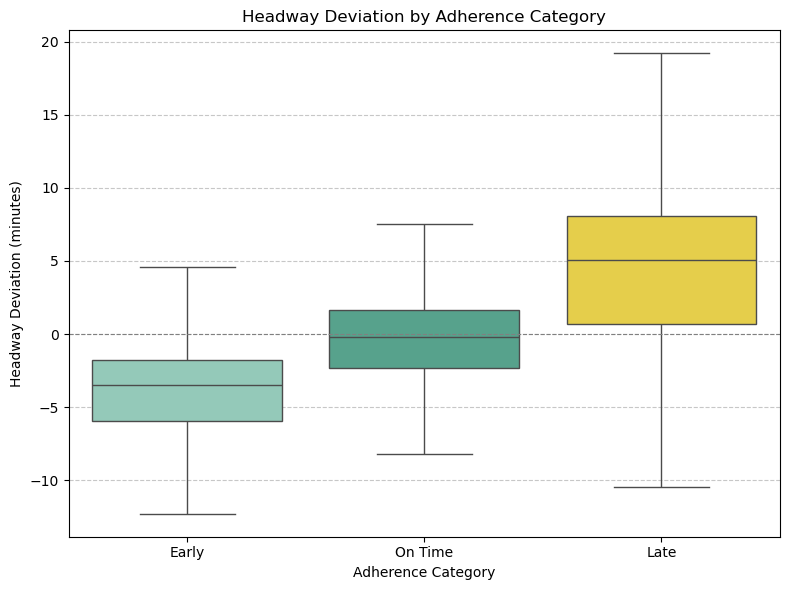

In [60]:
# --- Adherence vs Headway ---
print("Generating Adherence vs. Headway Box Plot...")

# Assume 'wego' DataFrame exists
df_box = wego.copy()

# Ensure required columns
df_box['ADHERENCE'] = pd.to_numeric(df_box['ADHERENCE'], errors='coerce')
df_box['HDWY_DEV'] = pd.to_numeric(df_box['HDWY_DEV'], errors='coerce')
df_box.dropna(subset=['ADHERENCE', 'HDWY_DEV'], inplace=True)

# Define and apply adherence categorization (can reuse function from above)
# def categorize_adherence(x): ... (if not defined in same cell)
df_box['Adherence_Category'] = df_box['ADHERENCE'].apply(categorize_adherence)

# Define category order for plot
category_order = ['Early', 'On Time', 'Late']
df_box['Adherence_Category'] = pd.Categorical(df_box['Adherence_Category'], categories=category_order, ordered=True)

# Plotting
plt.figure(figsize=(8, 6)) # Adjusted size slightly
# Define palette matching our theme order (Early, On Time, Late)
palette = {"Early": "#8bd2bd", "On Time": "#4aaf91", "Late": "#ffe031"}
sns.boxplot(x="Adherence_Category", y="HDWY_DEV", data=df_box, order=category_order, palette=palette, showfliers=False) # Turn off outliers for cleaner look, optional
plt.title("Headway Deviation by Adherence Category")
plt.xlabel("Adherence Category")
plt.ylabel("Headway Deviation (minutes)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Line at 0 deviation
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Filtered down to 55920 records for Friday.


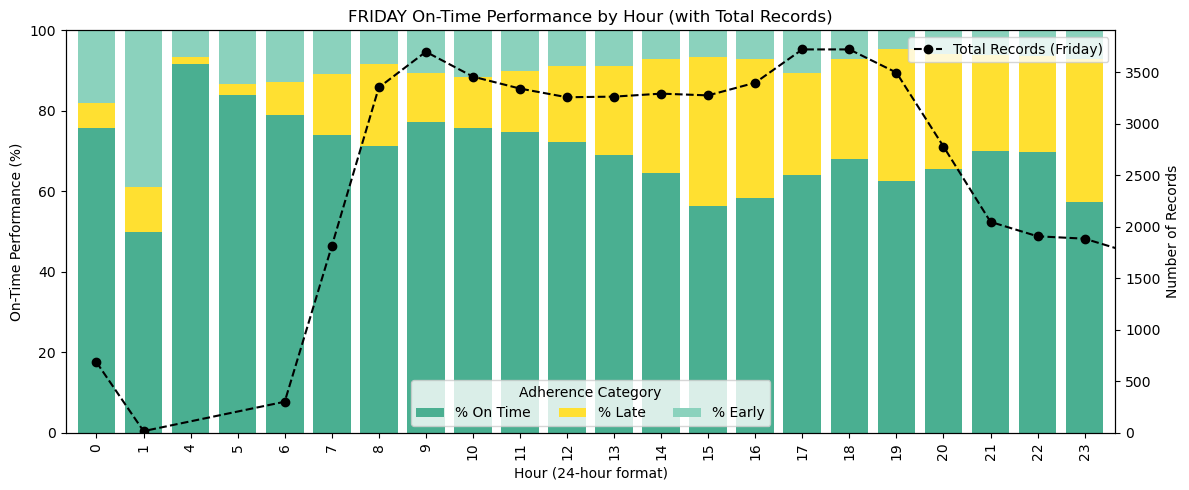

In [61]:
df_friday = wego.copy()

# --- Data Preparation ---
# 1. Ensure time columns and types, create HOUR and DAY_OF_WEEK
try:
    df_friday['DATETIME'] = pd.to_datetime(df_friday['SCHEDULED_TIME'], errors='coerce')
    df_friday['HOUR'] = df_friday['DATETIME'].dt.hour
    df_friday['DAY_OF_WEEK'] = df_friday['DATETIME'].dt.day_name() # Need day name for filtering
    df_friday['ADHERENCE'] = pd.to_numeric(df_friday['ADHERENCE'], errors='coerce')
    # Minimal drop for essential columns for this plot
    df_friday.dropna(subset=['DATETIME', 'HOUR', 'DAY_OF_WEEK', 'ADHERENCE'], inplace=True)
except Exception as e:
    print(f"Error during data preparation: {e}")
    raise ValueError("Could not process required columns.") from e

# 2. **** FILTER FOR FRIDAY ****
friday_data = df_friday[df_friday['DAY_OF_WEEK'] == 'Friday'].copy()
print(f"Filtered down to {len(friday_data)} records for Friday.")

if friday_data.empty:
    print("No data found for Friday. Cannot generate plot.")
else:
    # 3. Define and apply adherence categorization
    def categorize_adherence(x):
        if pd.isna(x): return "Unknown"
        elif x > 1: return "Early"
        elif x < -6: return "Late"
        else: return "On Time"
    friday_data['Adherence_Category'] = friday_data['ADHERENCE'].apply(categorize_adherence)

    # 4. Group by Hour and Adherence Category (using ONLY Friday data)
    friday_hourly_counts = friday_data.groupby(['HOUR', 'Adherence_Category']).size().unstack(fill_value=0)

    # Ensure all expected categories exist
    expected_categories = ['On Time', 'Late', 'Early']
    for cat in expected_categories:
        if cat not in friday_hourly_counts.columns:
            friday_hourly_counts[cat] = 0
    friday_hourly_counts = friday_hourly_counts[expected_categories]

    # 5. Calculate Total and Percentage Performance for Friday
    friday_hourly_counts["Total"] = friday_hourly_counts.sum(axis=1)
    for cat in expected_categories:
         friday_hourly_counts[f"% {cat}"] = friday_hourly_counts.apply(lambda row: (row[cat] / row["Total"] * 100) if row["Total"] > 0 else 0, axis=1)

    # --- Plotting ---
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Define colors
    colors = ['#4aaf91', '#ffe031', '#8bd2bd'] # On Time, Late, Early
    plot_cols = ["% On Time", "% Late", "% Early"]

    # Plot using Friday's hourly data
    plot_data = friday_hourly_counts[plot_cols]
    plot_data.plot(kind="bar", stacked=True, ax=ax1, width=0.8, color=colors)

    ax1.set_ylabel("On-Time Performance (%)")
    ax1.set_ylim(0, 100)
    ax1.legend(loc="lower center", title="Adherence Category", ncol=3)
    ax1.set_xlabel("Hour (24-hour format)")

    # Second y-axis for number of stops on Friday
    ax2 = ax1.twinx()
    ax2.plot(friday_hourly_counts.index, friday_hourly_counts["Total"], color="black", marker="o", linestyle='--', label="Total Records (Friday)")
    ax2.set_ylabel("Number of Records")
    ax2.legend(loc="upper right")
    ax2.set_ylim(bottom=0)

    # Update title
    plt.title("FRIDAY On-Time Performance by Hour (with Total Records)")
    plt.xticks(ticks=range(len(friday_hourly_counts.index)), labels=friday_hourly_counts.index, rotation=0)
    plt.tight_layout()
    plt.show()